In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import TimeSeriesSplit
from statsmodels.tsa.stattools import kpss
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from tsfresh import extract_features
from tsfresh.feature_extraction import EfficientFCParameters
from tsfresh.utilities.dataframe_functions import impute

%config InlineBackend.figure_format = 'retina'

In [2]:
max_row = 10000

abnormal_df = pd.read_csv('abnormal_train.csv', nrows = max_row)
abnormal_df_label = pd.read_csv('abnormal_labels.csv', nrows = max_row)
abnormal_df.head()


,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11
0,-2.00,1.51,10.14,0.0,0.0,0.0,-15.78,-22.31,-11.70,-13.57,92.95
1,-2.00,1.51,10.13,0.0,0.0,0.0,-16.86,-23.38,-10.31,-13.57,92.95
2,-2.00,1.51,10.13,0.0,0.0,0.0,-16.86,-23.38,-10.31,-13.57,92.95
3,-1.99,1.51,10.17,0.0,0.0,0.0,-16.86,-23.38,-10.31,-13.57,92.95
4,-1.99,1.51,10.17,0.0,0.0,0.0,-16.86,-23.38,-10.31,-13.57,92.95


In [3]:
abnormal_df_label.head()

,label
0,0
1,0
2,0
3,0
4,0


In [4]:
abnormal_df_label.head()

,label
0,0
1,0
2,0
3,0
4,0


In [5]:
abnormal_df_label.groupby('label').size()

label
0    10000
dtype: int64

KPSS Test
----------------------------------------
Test Statistic:  2.1446652589282773
p-value:  0.01


/var/folders/b9/d_8nll_s47g6w2x0spndwwl80000gn/T/ipykernel_9168/3349474040.py:4: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_outputs = kpss(abnormal_df[col])


<Axes: ylabel='v1'>

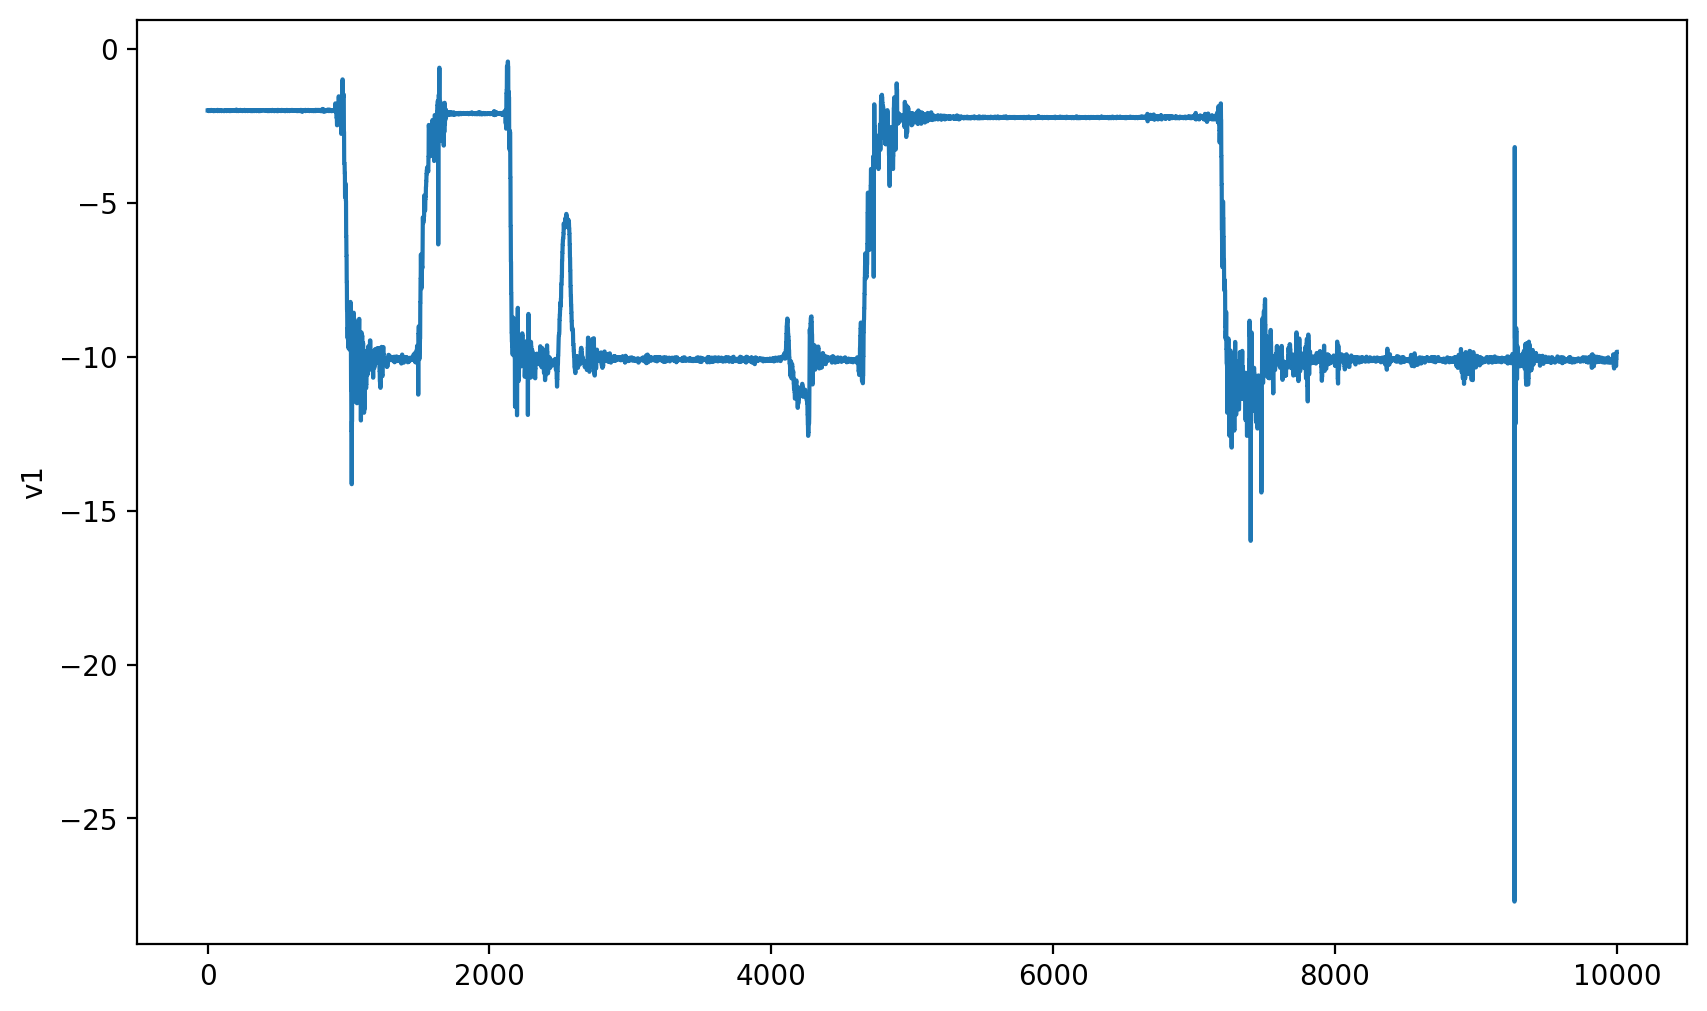

In [6]:
col = 'v1'

# Apply KPSS test
kpss_outputs = kpss(abnormal_df[col])

# Print the results
print('KPSS Test')
print('--'*20)
print('Test Statistic: ', kpss_outputs[0])
print('p-value: ', kpss_outputs[1])

# Plot the time series
plt.figure(figsize=(10, 6))
sns.lineplot(data=abnormal_df[col])


In [7]:
abnormal_df_diff = abnormal_df.diff().dropna()

KPSS Test
----------------------------------------
Test Statistic:  0.04903132693015477
p-value:  0.1


/var/folders/b9/d_8nll_s47g6w2x0spndwwl80000gn/T/ipykernel_9168/4194019195.py:4: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_outputs = kpss(abnormal_df_diff[col])


<Axes: ylabel='v1'>

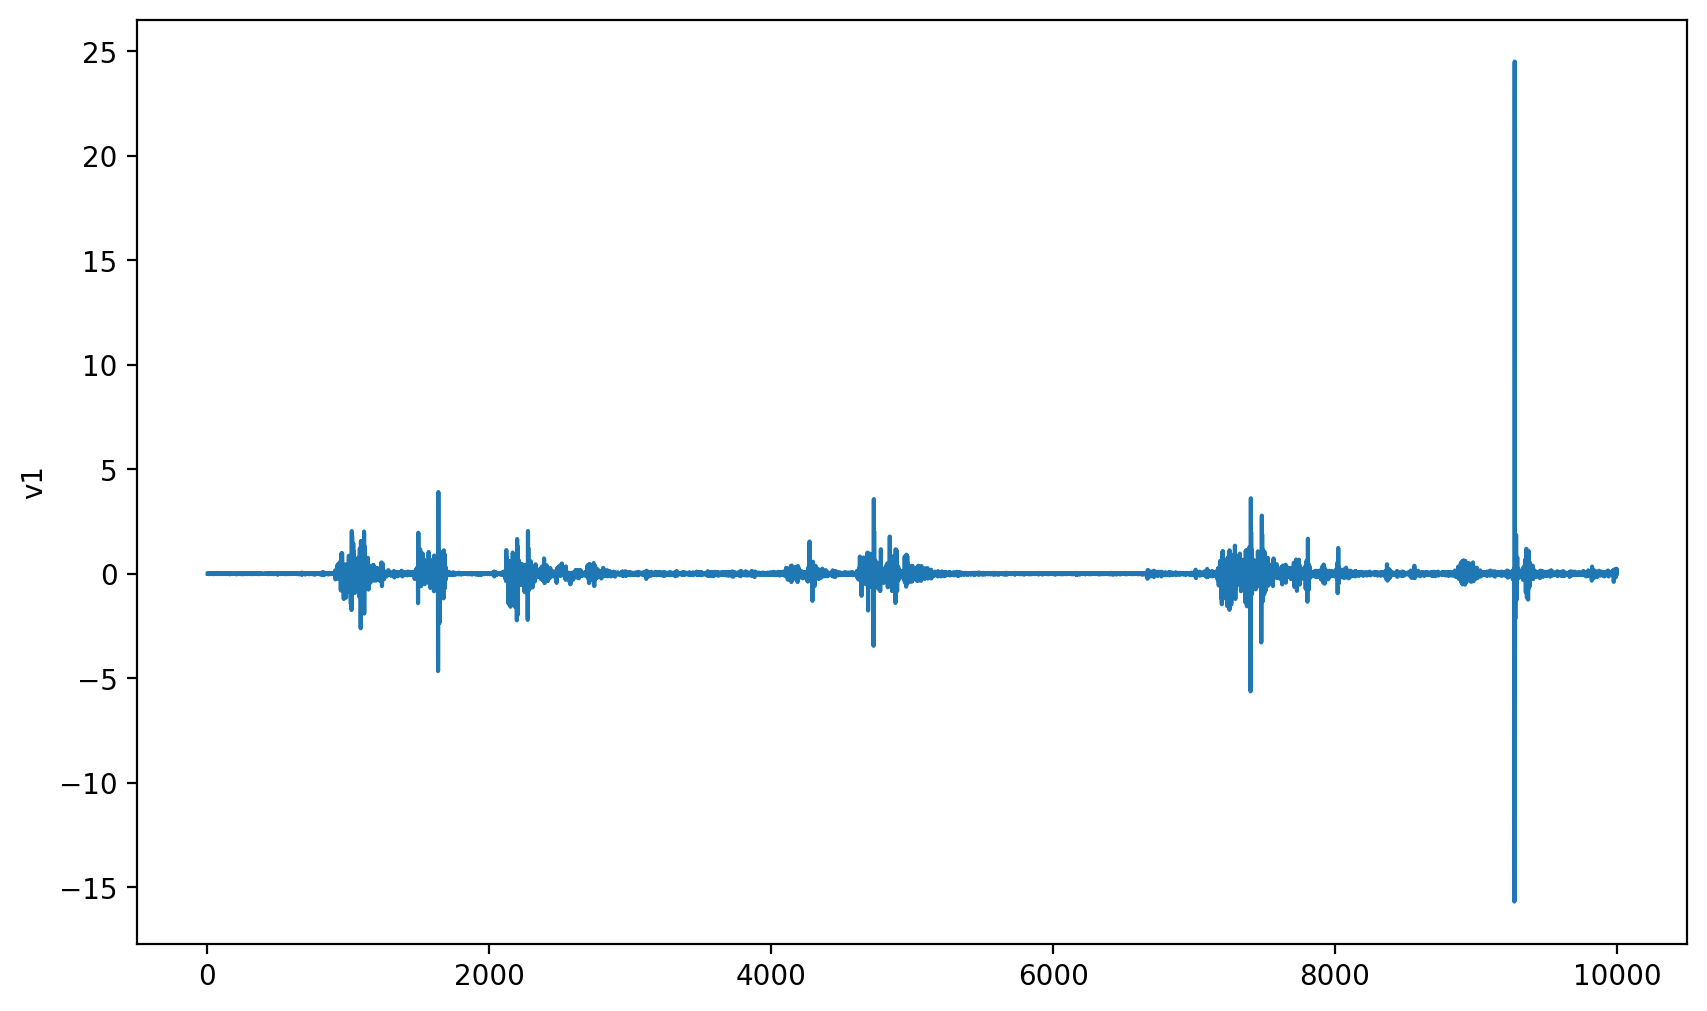

In [8]:
col = 'v1'

# Apply KPSS test
kpss_outputs = kpss(abnormal_df_diff[col])

# Print the results
print('KPSS Test')
print('--'*20)
print('Test Statistic: ', kpss_outputs[0])
print('p-value: ', kpss_outputs[1])

# Plot the time series
plt.figure(figsize=(10, 6))
sns.lineplot(data=abnormal_df_diff[col])

<Axes: >

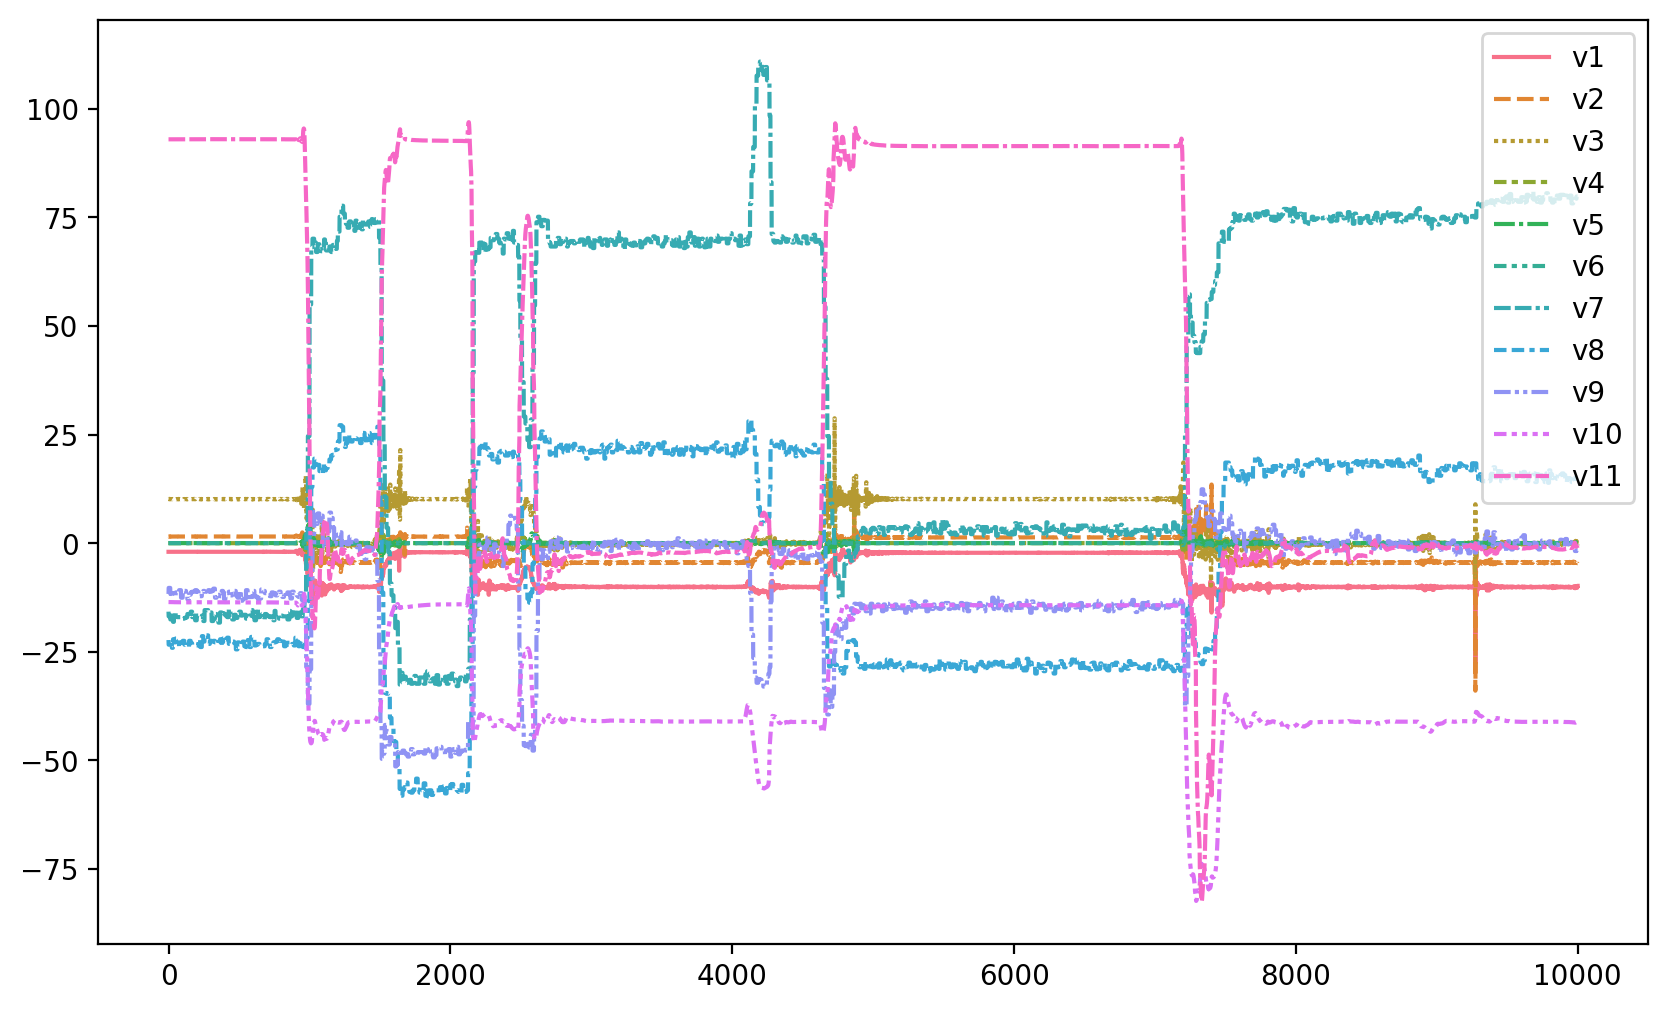

In [9]:
fig = plt.figure(figsize=(10, 6))
sns.lineplot(data = abnormal_df)

<Axes: >

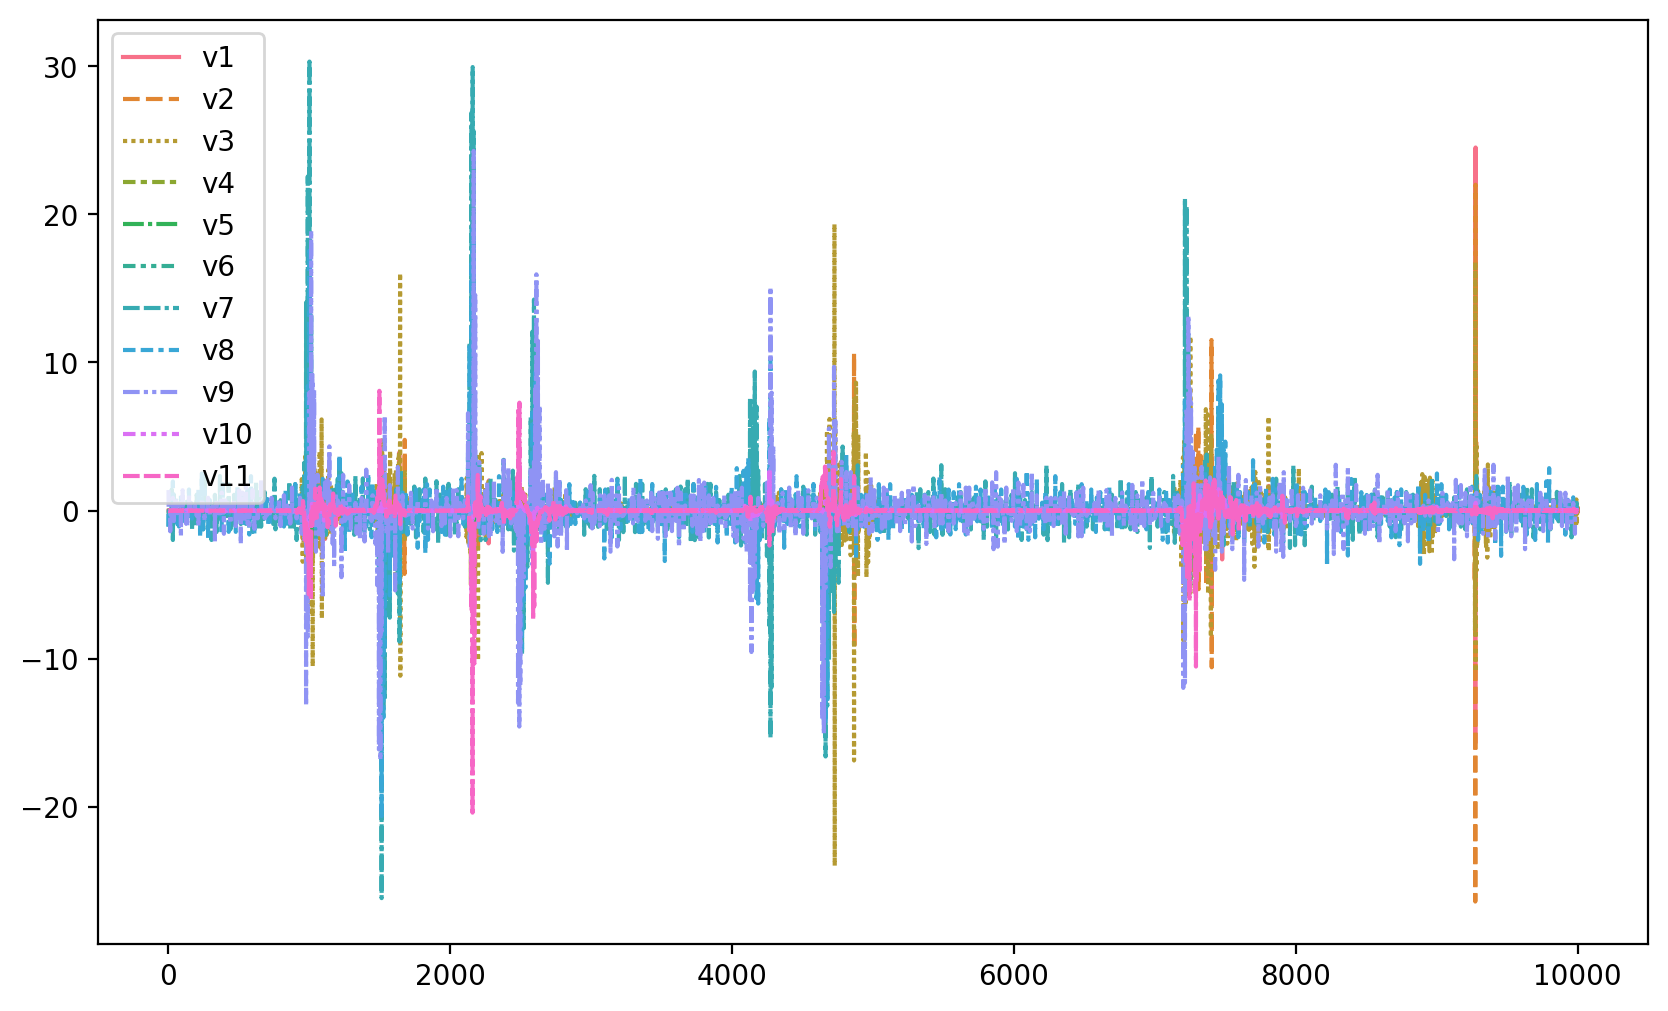

In [10]:
fig = plt.figure(figsize=(10, 6))
sns.lineplot(data = abnormal_df_diff)

In [11]:
tscv = TimeSeriesSplit(n_splits=5)

for train_index, test_index in tscv.split(abnormal_df):
    X_train, X_test = abnormal_df.iloc[train_index], abnormal_df.iloc[test_index]
    # If you have a separate target variable, you can do the same for y_train and y_test

In [12]:
tscv = TimeSeriesSplit(n_splits=5)

for train_index, test_index in tscv.split(abnormal_df_label):
    y_train, y_test = abnormal_df_label.iloc[train_index], abnormal_df_label.iloc[test_index]

In [13]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8334, 11), (1666, 11), (8334, 1), (1666, 1))

In [14]:
# Differencing the X_train and X_test datasets
X_train_diff = X_train.diff().dropna()
X_test_diff = X_test.diff().dropna()

# For test set, calculate the first difference with the last observation in the train set
# first_diff = X_test.iloc[0] - X_train.iloc[-1]
# X_test_diff = pd.concat([pd.Series(first_diff), X_test.diff().dropna()])

In [15]:
# Differencing the y_train and y_test datasets
y_train_diff = y_train.diff().dropna()
y_test_diff = y_test.diff().dropna()

# For test set, calculate the first difference with the last observation in the y_train set
# first_diff = y_test.iloc[0] - y_train.iloc[-1]
# y_test_diff = pd.concat([pd.Series(first_diff), y_test.diff().dropna()])

In [16]:
X_train_diff.shape, X_test_diff.shape, y_train_diff.shape, y_test_diff.shape

((8333, 11), (1665, 11), (8333, 1), (1665, 1))

Text(0.5, 1.0, 'Partial Autocorrelation Function (PACF)')

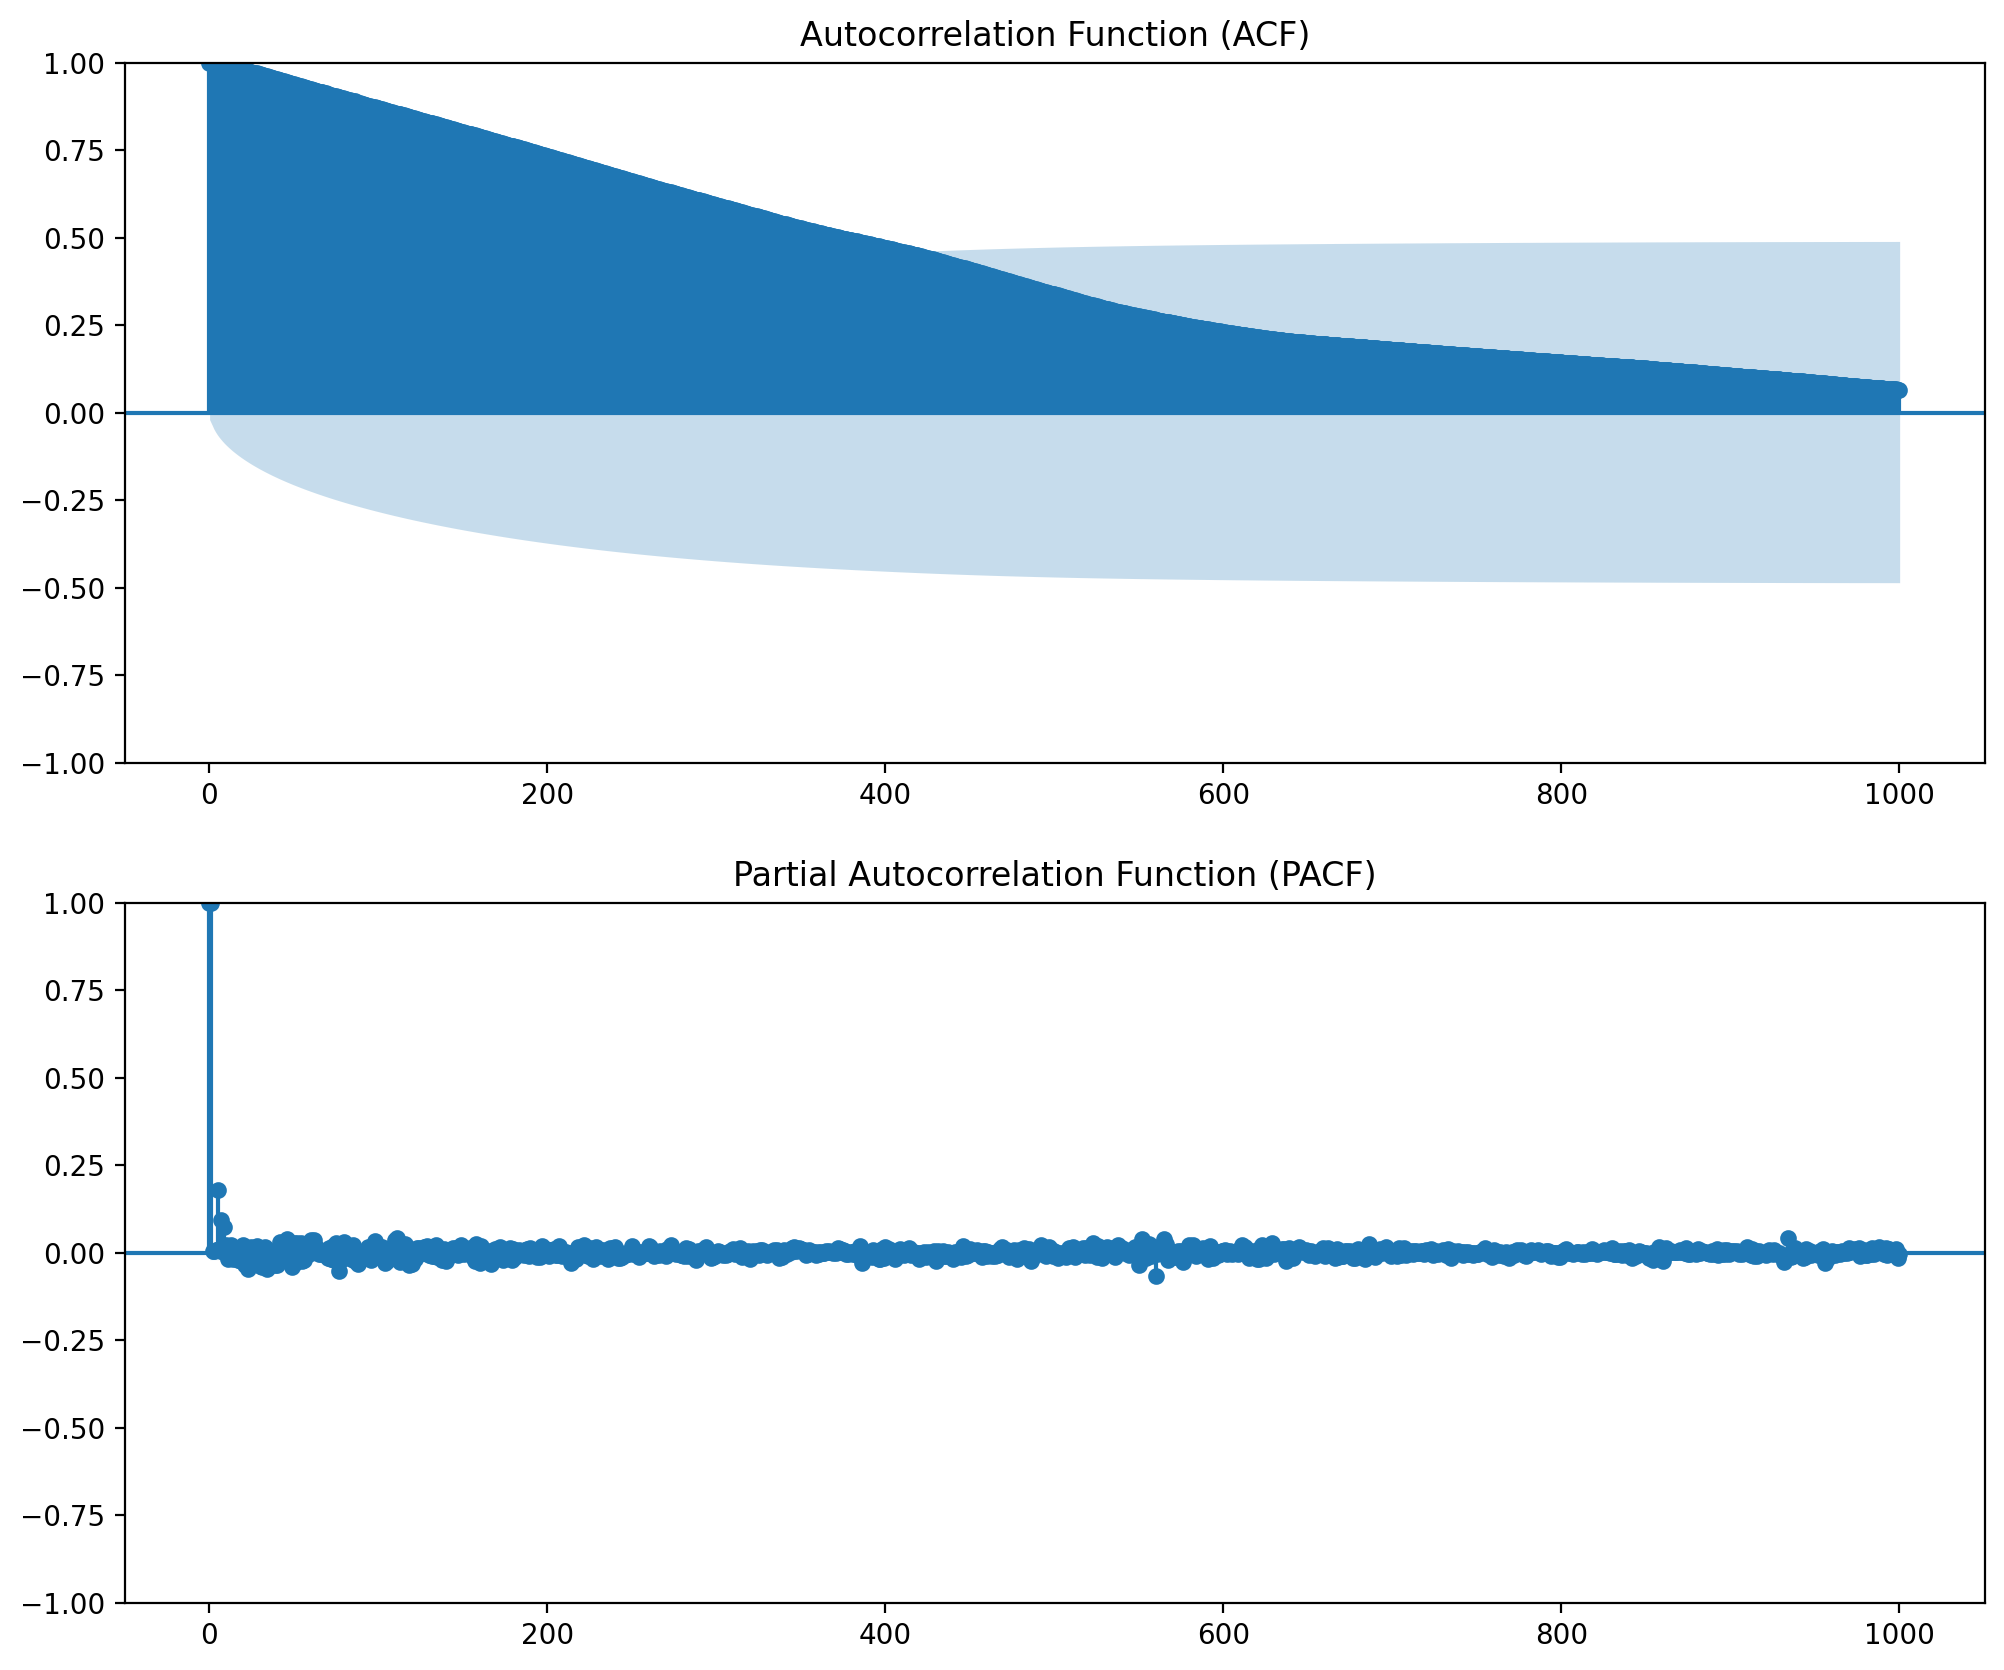

In [17]:
col = 'v1'

# Plot ACF and PACF for the AR(1) process
fig, (ax1, ax2) = plt.subplots(2, figsize=(12, 10))

# ACF plot
plot_acf(X_train[col], ax=ax1, lags=1000, alpha=0.05)
ax1.set_title('Autocorrelation Function (ACF)')

# PACF plot
plot_pacf(X_train[col], ax=ax2, lags=1000, alpha=0.05)
ax2.set_title('Partial Autocorrelation Function (PACF)')

Text(0.5, 1.0, 'Partial Autocorrelation Function (PACF)')

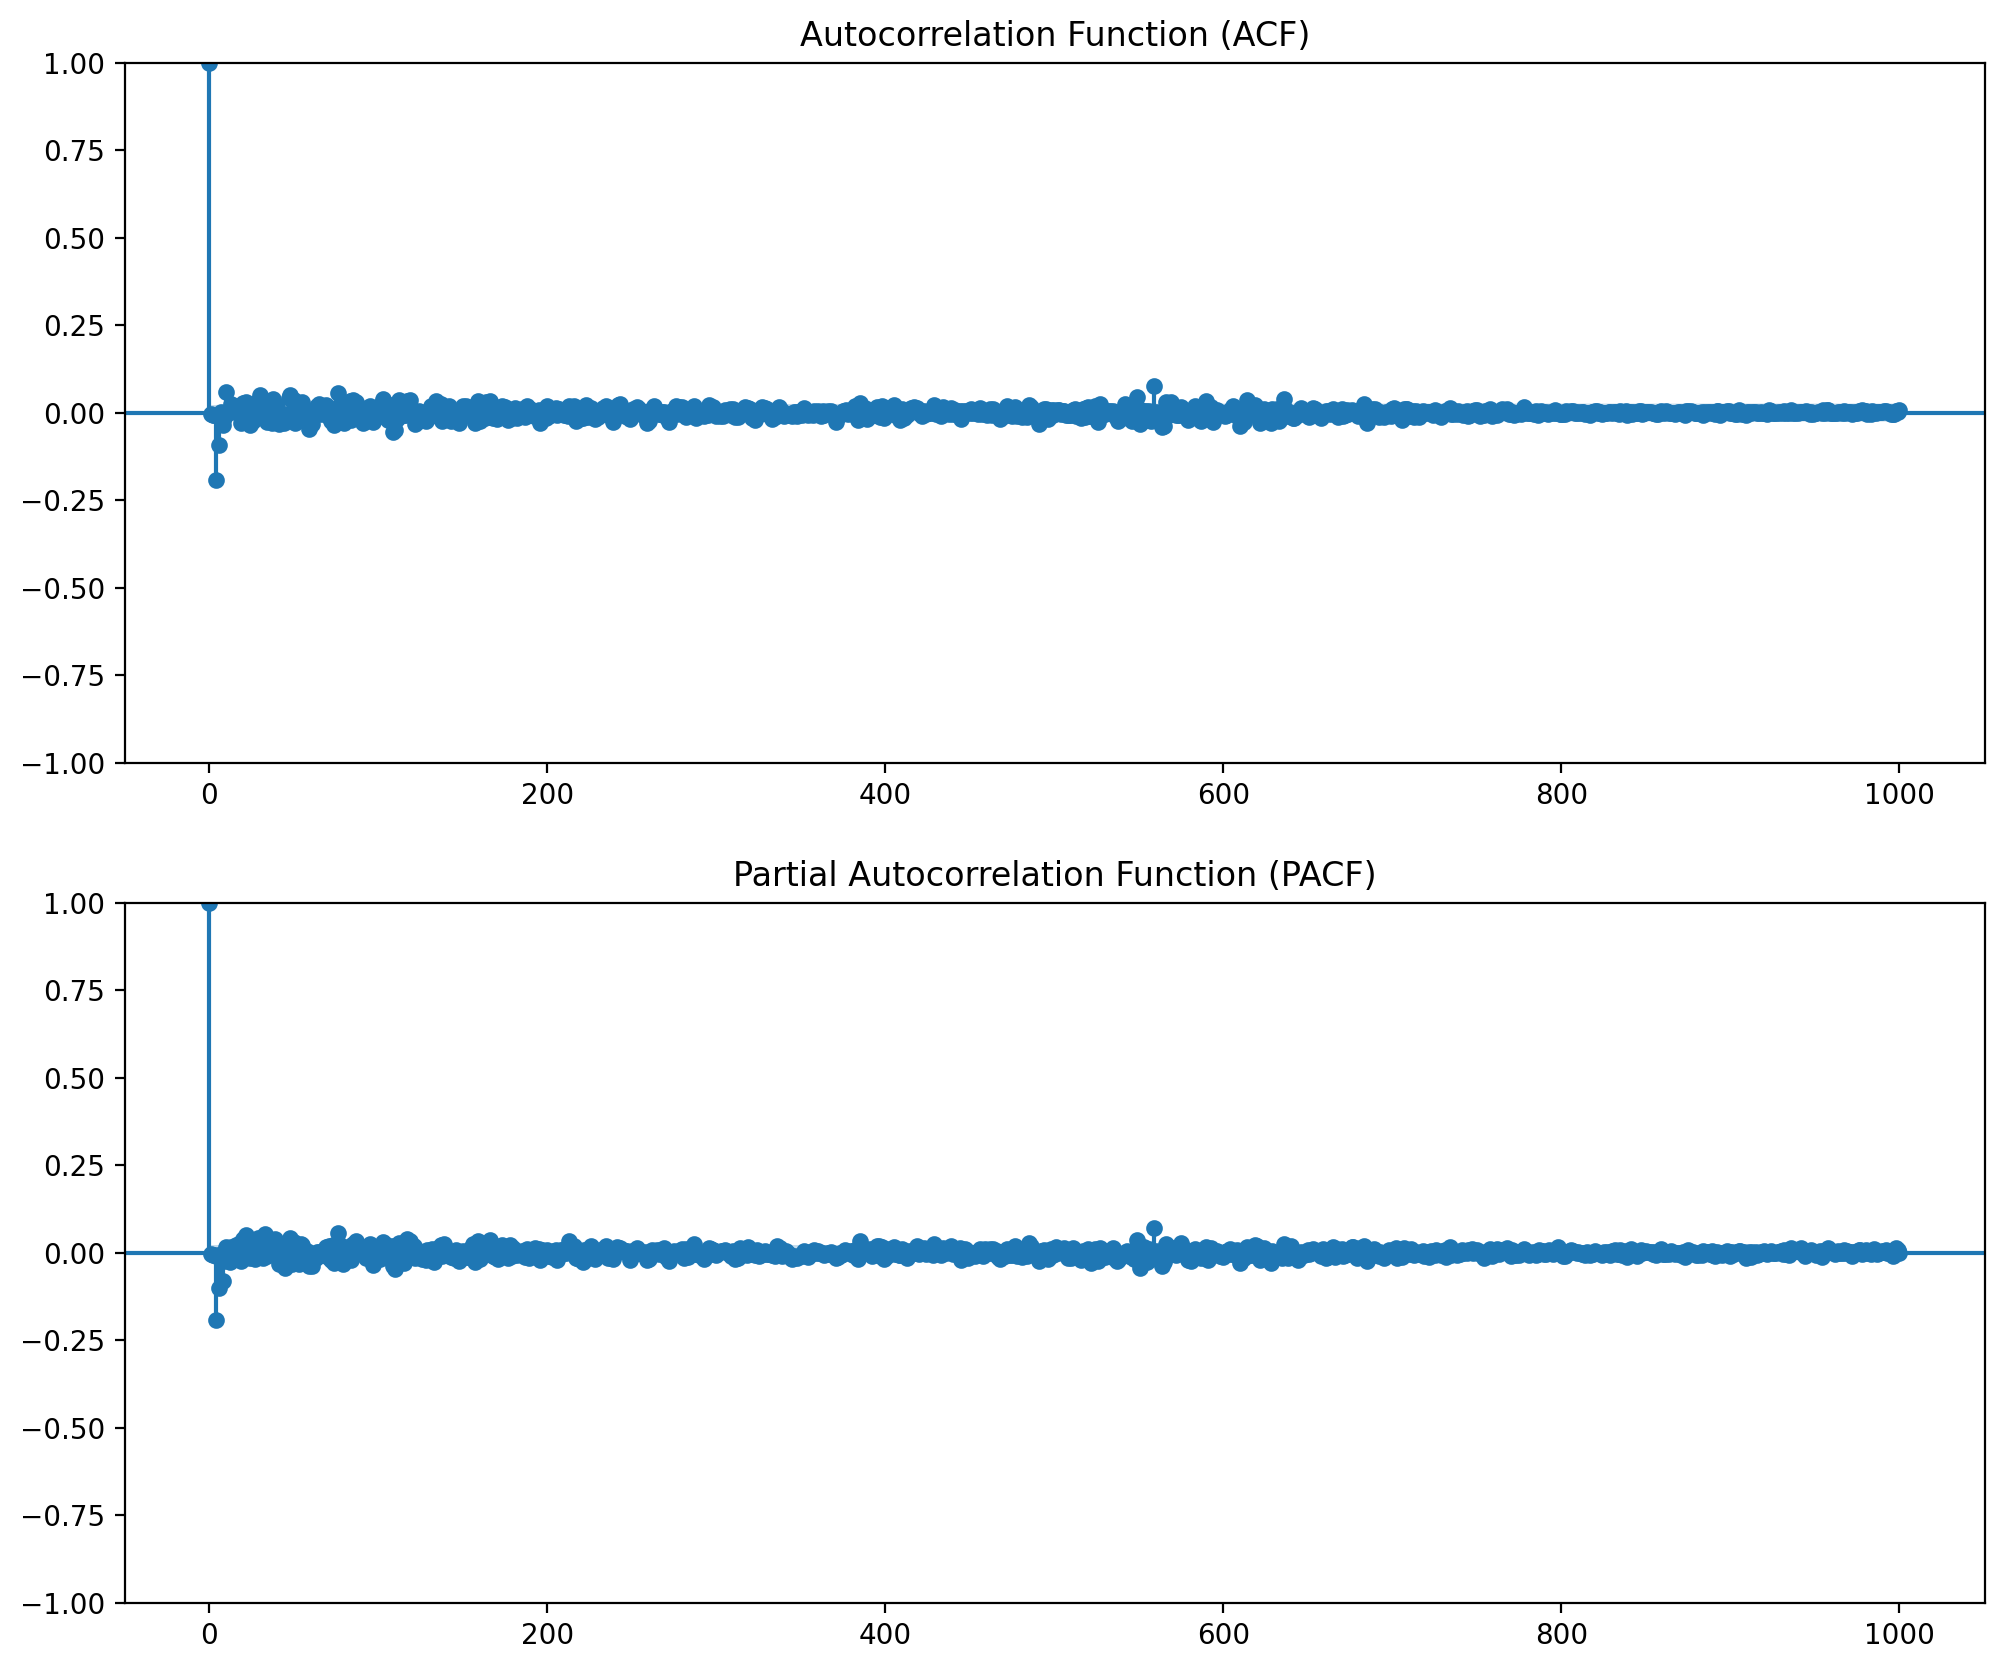

In [18]:
col = 'v1'

# Plot ACF and PACF for the AR(1) process
fig, (ax1, ax2) = plt.subplots(2, figsize=(12, 10))

# ACF plot
plot_acf(X_train_diff[col], ax=ax1, lags=1000, alpha=0.05)
ax1.set_title('Autocorrelation Function (ACF)')

# PACF plot
plot_pacf(X_train_diff[col], ax=ax2, lags=1000, alpha=0.05)
ax2.set_title('Partial Autocorrelation Function (PACF)')

In [19]:
# Extract features
settings = EfficientFCParameters()

X_train_diff_reset = X_train_diff.reset_index()
X_train_diff_reset['id'] = 0  # Assign a single ID for the entire series

X_train_diff_extract = extract_features(
                                    X_train_diff_reset, 
                                    column_id = "id",
                                    # column_sort="time",
                                    default_fc_parameters=settings
)

Feature Extraction: 100%|██████████| 12/12 [01:31<00:00,  7.66s/it]


In [23]:
X_test_diff_reset = X_test_diff.reset_index()
X_test_diff_reset['id'] = 0  # Assign a single ID for the entire series

X_test_diff_extract = extract_features(
                                    X_test_diff_reset, 
                                    column_id="id",
                                    # column_sort="time",
                                    default_fc_parameters=settings
)


Feature Extraction: 100%|██████████| 12/12 [00:23<00:00,  1.97s/it]


In [24]:
# Impute features
X_train_diff_imputed = impute(X_train_diff_extract)
X_test_diff_imputed = impute(X_test_diff_extract)

/Users/kenny_jung/Library/Python/3.9/lib/python/site-packages/tsfresh/utilities/dataframe_functions.py:198: RuntimeWarning: The columns ['index__query_similarity_count__query_None__threshold_0.0'
 'v4__friedrich_coefficients__coeff_0__m_3__r_30'
 'v4__friedrich_coefficients__coeff_1__m_3__r_30'
 'v4__friedrich_coefficients__coeff_2__m_3__r_30'
 'v4__friedrich_coefficients__coeff_3__m_3__r_30'
 'v4__max_langevin_fixed_point__m_3__r_30'
 'v4__query_similarity_count__query_None__threshold_0.0'
 'v1__friedrich_coefficients__coeff_0__m_3__r_30'
 'v1__friedrich_coefficients__coeff_1__m_3__r_30'
 'v1__friedrich_coefficients__coeff_2__m_3__r_30'
 'v1__friedrich_coefficients__coeff_3__m_3__r_30'
 'v1__max_langevin_fixed_point__m_3__r_30'
 'v1__query_similarity_count__query_None__threshold_0.0'
 'v2__friedrich_coefficients__coeff_0__m_3__r_30'
 'v2__friedrich_coefficients__coeff_1__m_3__r_30'
 'v2__friedrich_coefficients__coeff_2__m_3__r_30'
 'v2__friedrich_coefficients__coeff_3__m_3__r_30'
 'v2

In [25]:
# Select features
X_train_diff_selected = select_features(X_train_diff_imputed, y_train)
X_test_diff_selected = select_features[X_test_diff_imputed, y_test]

NameError: name 'select_features' is not defined